In [1]:
from IPython.display import Image
import pulp

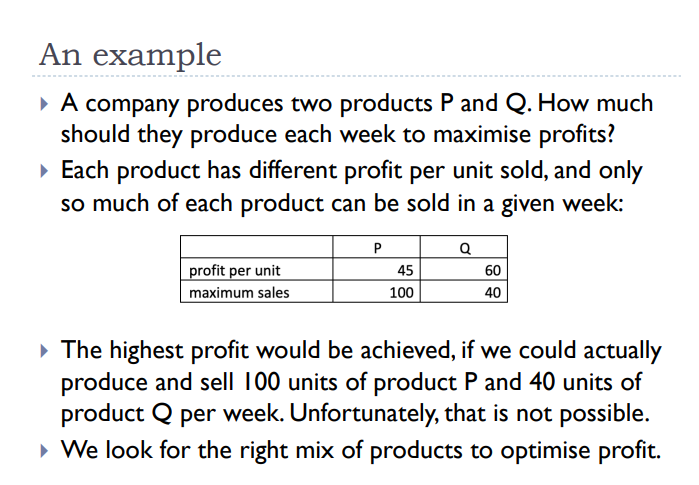

In [2]:
Image(filename='img/Example_Machine1.png',width=400,height=400)

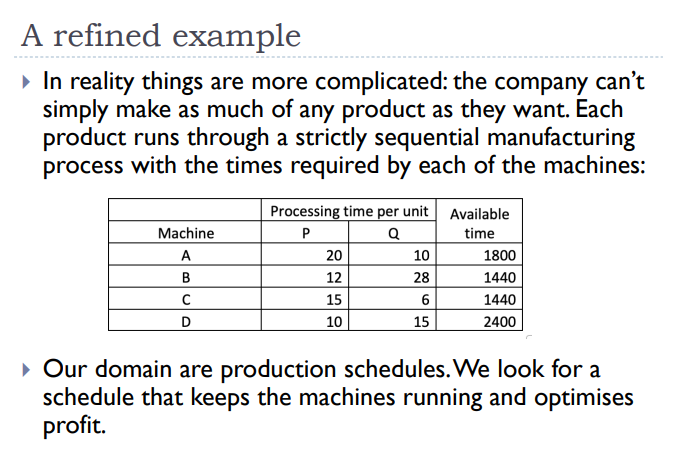

In [3]:
Image(filename='img/Example_Machine2.png',width=400,height=400)

> #### The above problem can be represented in mathematical equations, such as :

<img src='img/Example1.png' width = 400 height = 400>

In [4]:
# Now we will create variables of Pulp objects. 
# The default type of variable is continuous,
# but we can restrict them to integers. 

p = pulp.LpVariable("P",cat="Integer", lowBound = 0, upBound = 100)
q = pulp.LpVariable("Q",cat="Integer", lowBound = 0, upBound = 40)
type(p)

pulp.pulp.LpVariable

**Note**
- Unlike LP, PulP can solve Minimise as well as Maximise problems both, but we have to decice that while settin up the problem. 

In [5]:
prob = pulp.LpProblem("Production", pulp.LpMaximize)

In [6]:
# Addimg the objective function
prob += 45*p + 60*q
prob

Production:
MAXIMIZE
45*P + 60*Q + 0
VARIABLES
0 <= P <= 100 Integer
0 <= Q <= 40 Integer

### Adding constraints
> $20P  + 10 Q \le 1800$

> $12P +  28 Q \le 1440$

> $15P + 6Q \le 1440$

> $10P + 15Q \le 2400$ 

In [7]:
# prob += 20*p + 10*q <= 1800
# prob += 12*p + 28*q <= 1440
# prob += 15*p + 6*q <= 1440
# prob += 10*p + 15*q <= 2400

In [8]:
prob += pulp.LpConstraint(20*p + 10*q, 
                          name="MachineA",
                          sense= pulp.LpConstraintLE,
                          rhs=1800)
prob += pulp.LpConstraint(12*p + 28*q, 
                          name="MachineB",
                          sense= pulp.LpConstraintLE,
                          rhs=1440)
prob += pulp.LpConstraint(15*p + 6*q, 
                          name="MachineC",
                          sense= pulp.LpConstraintLE,
                          rhs=1440)

prob += pulp.LpConstraint(10*p + 15*q, 
                          name="MachineD",
                          sense= pulp.LpConstraintLE,
                          rhs=2400)

In [9]:
prob

Production:
MAXIMIZE
45*P + 60*Q + 0
SUBJECT TO
MachineA: 20 P + 10 Q <= 1800

MachineB: 12 P + 28 Q <= 1440

MachineC: 15 P + 6 Q <= 1440

MachineD: 10 P + 15 Q <= 2400

VARIABLES
0 <= P <= 100 Integer
0 <= Q <= 40 Integer

### Solving the problem
> When everything is okay, the solve method returns "1"

In [11]:
prob.solve()

1

In [14]:
# Check values:
print(pulp.value(p))
print(pulp.value(q))

82.0
16.0


In [15]:
prob.objective

45*P + 60*Q + 0

In [16]:
pulp.value(prob.objective)

4650.0